In [7]:
%matplotlib inline
%run ../../import_envs.py
%run ../baseline_hyperparams.py

CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda:1')

probtorch: 0.0+5a2c637 torch: 1.3.0
inference method:baseline-mlp, epochs:30, sample size:50, batch size:10, learning rate:0.0005


In [12]:
# load test data
# test_sets = ['pts_20', 'pts_40', 'pts_60', 'pts_80', 'pts_100']
test_sets = ['pts_100']

DATAs = []
for s in test_sets:
    data = torch.from_numpy(np.load(DATA_DIR + 'gmm/test/' + s + '/' + 'ob.npy')).float() ## load testing datasets
    DATAs.append(data)
## load the weights
# from apg_modeling_neural import init_model
from baseline_modeling import init_model

model = init_model(architecture=ARCHITECTURE,
                      model_params=model_params, 
                      CUDA=CUDA, 
                      DEVICE=DEVICE, 
                      LOAD_VERSION=LOAD_VERSION,
                      LR=None)

#### One-shot prediction

<Figure size 432x288 with 0 Axes>

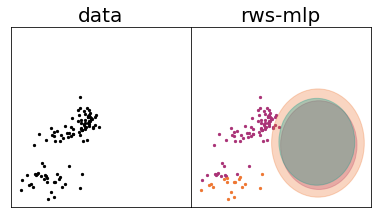

In [13]:
## visualize samples
%run ../baseline_testing.py
from viz import viz_samples

APG_SWEEPS_TEST = 0
DATA_PTR = 2
SAVE_NAME = 'samples-%d' % DATA_PTR

datas = sample_data_uniform(DATAs=DATAs, 
                            data_ptr=DATA_PTR)


SAMPLE_SIZE_TEST = 1

metrics = test_single(model=model, 
                      architecture=ARCHITECTURE, 
                      datas=datas, 
                      sample_size=SAMPLE_SIZE_TEST, 
                      CUDA=CUDA, 
                      DEVICE=DEVICE)


viz_samples(datas=datas,
            metrics=metrics,
            apg_sweeps=APG_SWEEPS_TEST,
            K=K, 
            viz_interval=1, 
            figure_size=5, 
            title_fontsize=20, 
            marker_size=5.0, 
            opacity=0.3, 
            bound=15, 
            colors=['#AA3377', '#EE7733', '#009988', '#0077BB', '#BBBBBB', '#EE3377', '#DDCC77'],
            save_name=None)

#### True gibbs updates after one-shot 


<Figure size 432x288 with 0 Axes>

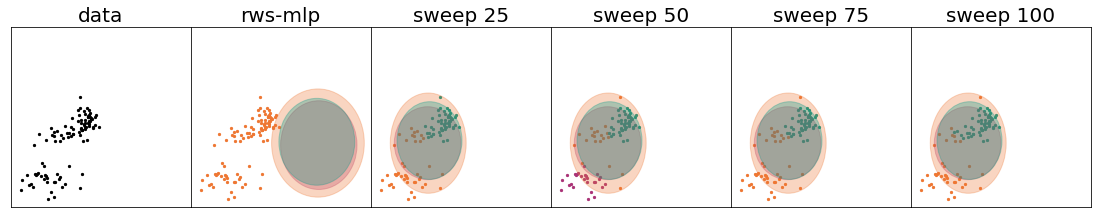

In [24]:
%run ../gibbs_testing.py
from viz import viz_samples
GIBBS_SWEEPS_TEST = 100
DATA_PTR = 2
SAVE_NAME = 'samples-%d' % DATA_PTR

datas = sample_data_uniform(DATAs=DATAs, 
                            data_ptr=DATA_PTR)


SAMPLE_SIZE_TEST = 100

metrics = test_single(model=model, 
                      gibbs_sweeps=GIBBS_SWEEPS_TEST, 
                      datas=datas, 
                      sample_size=SAMPLE_SIZE_TEST, 
                      CUDA=CUDA, 
                      DEVICE=DEVICE)

viz_samples(datas=datas,
            metrics=metrics,
            apg_sweeps=GIBBS_SWEEPS_TEST,
            K=K, 
            viz_interval=25, 
            figure_size=15, 
            title_fontsize=20, 
            marker_size=5.0, 
            opacity=0.3, 
            bound=15, 
            colors=['#AA3377', '#EE7733', '#009988', '#0077BB', '#BBBBBB', '#EE3377', '#DDCC77'],
            save_name=None)

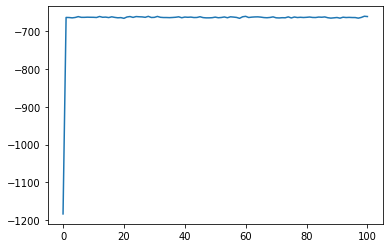

In [25]:
log_joint = metrics[0]['density'].cpu()
import matplotlib.pyplot as plt
plt.plot(log_joint)